**Кучков Иван**

Датасет: Данные анализа вин

[link](https://archive.ics.uci.edu/ml/datasets/wine+quality)

## Лабораторная 2

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Считываем исходный датасет

In [4]:
data = pd.read_csv('../dataset/winequality-red.csv', sep = ';', engine = 'python')

Данный датасет — вторая часть представленных данных. Первая часть — белые вина, вторая — красные. Несмотря на разницу в количестве данных, для увелечения личной практической пользы был выбран именно датасет с красными винами.

Создатели данного датасета приследовали цель моделировать качество вина на основе физико-химических тестах исходных материалов. 

## Входные параметры
- 1.`fixed acidity` (фиксированная кислотность)
- 2.`volatile acidity` (летучая кислотность)
- 3.`citric acid` (лимонная кислота)
- 4.`residual sugar` (остаточный сахар)
- 5.`сhlorides` (хлориды)
- 6.`free sulfur dioxide` (свободный диоксид серы)
- 7.`total sulfur dioxide` (общий диоксид серы)
- 8.`density` (плотность)
- 9.`pH` (кислотность)
- 10.`sulphates` (сульфаты)
- 11.`alcohol` (алкоголь)

## Параметры на выходе
- 1.`quality` (качество от 0 до 10)

Посмотрим на представленные данные:

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
print(data.shape)
print(data.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## Рассмотрим некоторые зависимости данных

Основные характеристики (статистическая информация о распределении данных по каждому признаку и выходу — качетсво)

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


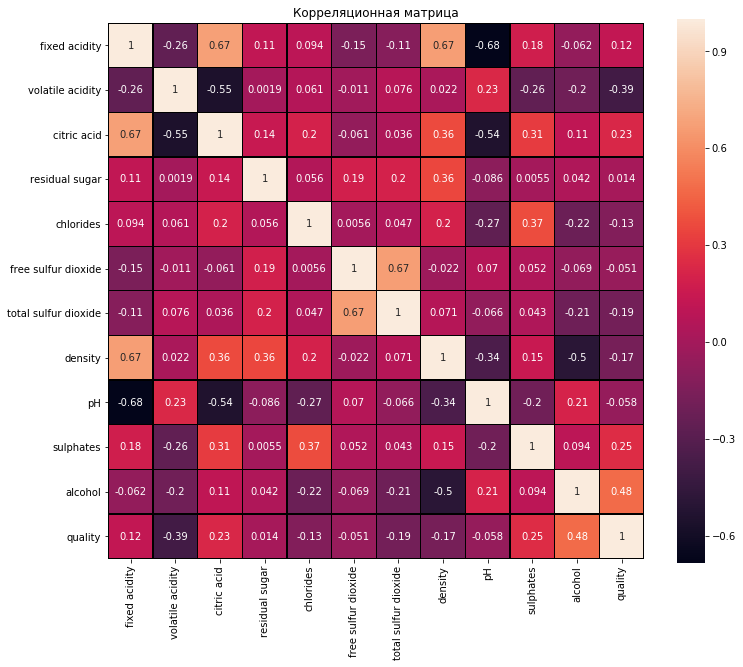

In [218]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Корреляционная матрица')
sns.heatmap(data.corr(), linewidths=0.25, vmax=1.0, square=True,
           linecolor='black', annot=True)

Диаграмму матрицы рассеивания:

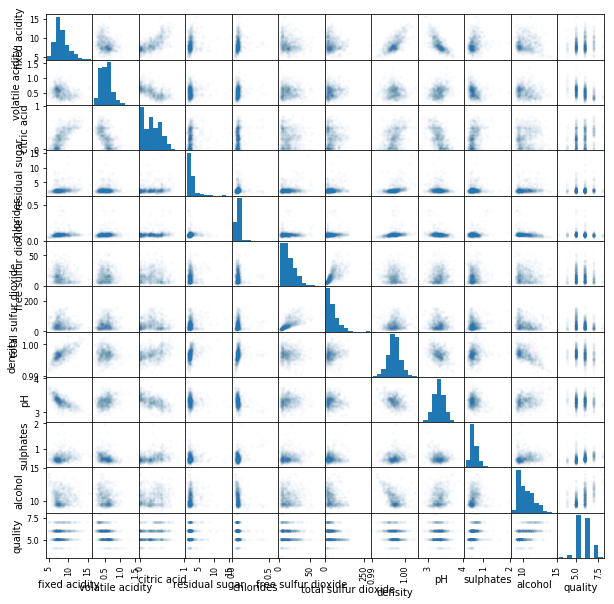

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Проверим зависимость параметров:

In [12]:
corrs = data.corr().abs()
np.fill_diagonal(corrs.values, -2)
corrs.max()

fixed acidity           0.682978
volatile acidity        0.552496
citric acid             0.671703
residual sugar          0.355283
chlorides               0.371260
free sulfur dioxide     0.667666
total sulfur dioxide    0.667666
density                 0.668047
pH                      0.682978
sulphates               0.371260
alcohol                 0.496180
quality                 0.476166
dtype: float64

Построим график зависимостей по наибольшим коэффициентам в таблице:

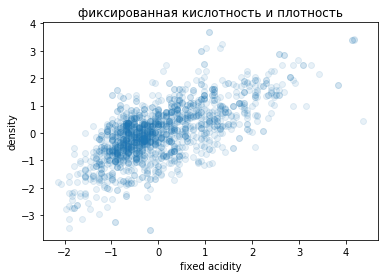

In [222]:
plt.plot(data['fixed acidity'], data['density'], 'o', alpha = 0.10)
plt.xlabel('fixed acidity')
plt.ylabel('density')
plt.title('фиксированная кислотность и плотность')
pass

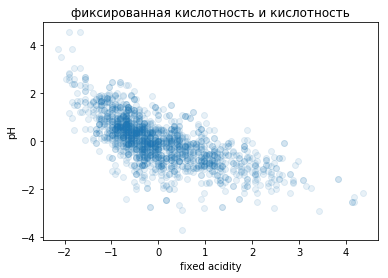

In [223]:
plt.plot(data['fixed acidity'], data['pH'], 'o', alpha = 0.10)
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.title('фиксированная кислотность и кислотность')
pass

Из графиков видно, что фиксированная кислотность и плотность имеют положительную корреляцию, а фиксированная кислотность и pH — отрицательную

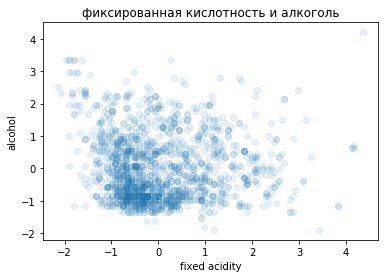

In [224]:
plt.plot(data['fixed acidity'], data['alcohol'], 'o', alpha = 0.10)
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.title('фиксированная кислотность и алкоголь')
pass

In [16]:
k = 0
for q in data["quality"]:
    if (q >= 7):
        k = k+1
print(k, k / data["quality"].count())

217 0.1357098186366479


## Постановка задачи и преобразование данных

#### Постановка задачи : 
* определить влияние комбинаций различных характеристик вина на итоговую оценку качества.

Рассматриваемая задача улучшает представления о фактарах производства красных вин на итоговое качество продукта и является интересной с точки зрения реальных исследований на производстве с целью улучшения качества продукта

#### Преобразование данных: 
* представленные данные уже прошли предобработку и не требует существенных изменений

Будес считать вино хорошим, если оно обладает оценкой качества 7 и больше.

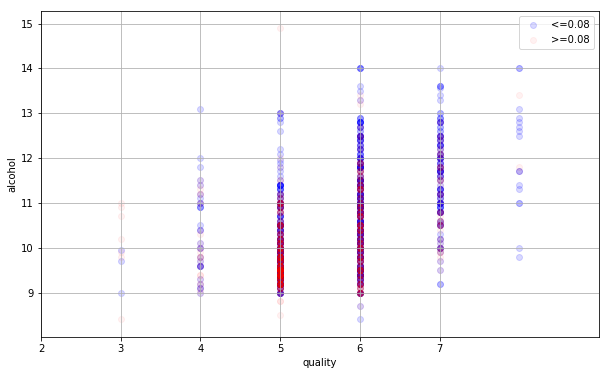

In [17]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['chlorides'] <= 0.08]['quality'],
            data[data['chlorides'] <= 0.08]['alcohol'],
            alpha = 0.15,
            label = '<=0.08',
            color = 'b')

plt.scatter(data[data['chlorides'] >= 0.08]['quality'],
            data[data['chlorides'] >= 0.08]['alcohol'],
            alpha = 0.05,
            label = '>=0.08',
            color = 'r')

plt.xlabel('quality')
plt.xticks(range(8))
plt.xlim(2, 9)
plt.ylabel('alcohol')
plt.legend()
plt.grid()

Предположение: среди более качественных вин больше тех, чей уровень алкоголя выше, кроме того в них меньшее содержание хлоридов используемых в происзводстве.

## Обработка данных

In [18]:
data.median(axis = 0)

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [19]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Выделим категориальные и числовые характеристики. В качестве категориальной характеристики будет выступать 'quality'.

In [20]:
categorical_columns = ['quality']
numerical_columns = [c for c in data.columns if c != 'quality']
print(categorical_columns)
print(numerical_columns)

['quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [21]:
for c in categorical_columns:
    print(c, data[c].unique())

quality [5 6 7 4 8 3]


Нам не нужно заполнят пропущенные значения для каждой количественной переменной, так как в данных нет пропусков, но если бы нам нужно было это делать мы бы посользовались медианным значением. Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [22]:
data.median(axis = 0)

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [23]:
data[numerical_columns].count(axis = 0)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
dtype: int64

In [24]:
data[categorical_columns].count(axis = 0)

quality    1599
dtype: int64

In [25]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0)

In [26]:
data_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00


## Векторизация

Выясним,какие категориальные признаки являются и какие не являются бинарными.

In [27]:
print(categorical_columns)
print(numerical_columns)

['quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [28]:
data.count(axis = 0)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [29]:
data_nonbinary = data['quality']
data_nonbinary.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Так как все характеристики кроме quialiry числовые — векторизацию применять не нужно

## Нормализация

Выполним нормализацию количественных признаков. Для этого каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению

In [30]:
data_nonbinary = data['quality']
data_nonbinary.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

#### Записали данные в единую таблицу

In [31]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(1599, 12)


## Выборки

In [32]:
X = data.drop(('quality'), axis = 1) # выбрасываем столбец 'quality'
y = data['quality']
feature_names = X.columns
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [33]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1599, 11)
(1599,)


In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
type(y)

pandas.core.series.Series

Получим тестовую выборку и тренировочную с соотношением 30/70, с которыми и будем работать.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1119 480


In [37]:
print(N_train + N_test)

1599


In [38]:
print((N_train + N_test) == data.count())

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


## Метод K ближайших соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [40]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2779267202859696 0.4479166666666667


Ошибки на тестовой и на тренировочной выборках близки. Попробуем подобрать параметры,чтобы уменьшить ошибку на тестовой выборке

In [41]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[  0   0   0   1   0   0]
 [  1   2   7   7   0   0]
 [  1   1 136  55   2   0]
 [  1   2  74 102  21   0]
 [  0   0   7  29  25   0]
 [  0   0   1   2   3   0]]


Грубых ошибок, то есть таких случаев,когда реальное и полученное значение отличаются координально, наблюдается сравнительно немного.
Попробуем подобрать параметры для уменьшения ошибки.

In [42]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3,4, 5,6, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=4)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.39410187667560326 1


In [43]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.375


Значение ошибки уменьшилось

# Обучение полносвязной (неглубокой) нейронной сети

## Обучаем классификатор

In [44]:
from sklearn.neural_network import MLPClassifier

In [60]:
mlp_model = MLPClassifier(hidden_layer_sizes = (5,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Проверяем качество классификатора

In [61]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [62]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.34763181411974975 0.45208333333333334


Также можно получить другим способом:

In [63]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.6523681858802503 0.5479166666666667


Аналогично:

In [64]:
print(1 - mlp_model.score(X_train, y_train),1 - mlp_model.score(X_test, y_test))

0.34763181411974975 0.4520833333333333


Нетрудно видеть,что ошибки на тестовой и тренировочной выборках близки. Тем не менее, ошибка на тестовой выборке незначительно превосходит ошибку на обучающей выборке. Отсюда можно сделать вывод,что есть переобучение.

## Подбор гиперпараметров классификатора

Подберем оптимальное значение параметра регуляризации alpha


In [85]:
alpha_arr = np.logspace(-7, 1, 7)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (22,5), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

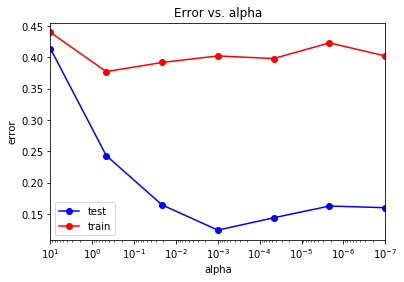

In [86]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки на обучающей и тестовой выборках:

In [87]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.12421805183199285 0.3770833333333333


Получим оптимальное значение параметра регуляризации alpha:

In [88]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.46415888]


In [69]:
alpha_opt = alpha_opt[0]

## Классификатор при найденном оптимальном значении alpha

Повторяем обучение классификаторас использованием найденного параметра регуляризации alpha

In [89]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (11,5),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.30116175156389635
0.425


В результате обучения получаем,что ошибка на тестовой выборке по-прежнему превосходит ошибку на тренировочной выборке. Можно сделать вывод,что даже с использованием оптимального значения параметра alpha наблюдается небольшое переобучение.

Попробуем подбором подобрать оптимальное количество нейронов на 1 и 2 слое и построить график зависимости ошибки от количества нейронов

In [226]:
neurons_arr0 = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40, 50, 60, 70, 80, 90, 100)
test_err = []
train_err = []
n_state_1 = []
n_state_2 = []
for neuron1 in neurons_arr0:
    for neuron2 in neurons_arr0:
        mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron1, neuron2), 
                                  solver = 'lbfgs', activation = 'logistic', random_state = 5)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err.append(np.mean(y_train != y_train_pred))
        n_state_1.append(neuron1)
        n_state_2.append(neuron2)
        test_err.append(np.mean(y_test != y_test_pred))

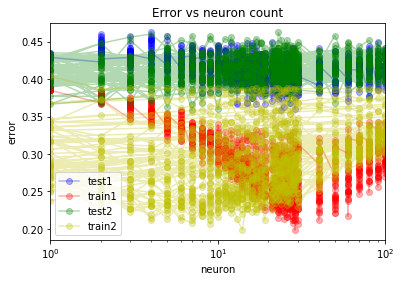

In [229]:
plt.semilogx(n_state_1, test_err, 'b-o', label = 'test1',alpha = 0.30)
plt.semilogx(n_state_1, train_err, 'r-o', label = 'train1',alpha = 0.30)
plt.semilogx(n_state_2, test_err, 'g-o', label = 'test2',alpha = 0.30)
plt.semilogx(n_state_2, train_err, 'y-o', label = 'train2',alpha = 0.30)
plt.xlim([np.min(n_state_1), np.max(n_state_1)])
plt.title('Error vs neuron count')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

In [231]:
min_test_error = test_err[0]
min_index = 0
for i in range(len(n_state_1)):
    if test_err[i] < min_test_error:
        min_test_error = test_err[i]
        min_index = i
print("Минимальная ошибка на тестовой выборке ", min_test_error, " была получена при (" , n_state_1[min_index] , " , ", n_state_2[min_index], ") нейронах")

Минимальная ошибка на тестовой выборке  0.35833333333333334  была получена при ( 24  ,  7 ) нейронах


## Метрики качества

### Матрица рассогласования:

In [90]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  13 142  60   0   0]
 [  0   4  48 109  36   2]
 [  0   0   5  31  25   4]
 [  0   0   0   0   0   0]]


Как и при использовании метода K ближайших соседей, большая часть ошибок наблюдается с неправильным определением рейтинга. Грубых ошибок наблюдается не так много.

### Другие метрики качества:


In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.11        17
           5       0.64      0.75      0.69       195
           6       0.58      0.57      0.58       200
           7       0.47      0.41      0.44        61
           8       0.00      0.00      0.00         6

   micro avg       0.60      0.60      0.60       480
   macro avg       0.45      0.30      0.30       480
weighted avg       0.60      0.60      0.58       480



## Выводы

Полученные ошибки на тестовой и тренировочной выборках являются достаточно большими, но, по большому счету, это объясняется тем фактом, что использовался реальный датасет, а не искусственно сгенерированные данные. К тому же выбранные данные содержат такие признаки, как 
   рейтинг товара и рекомендация покупателя, 
которые являются 
   исключительно субъективными характеристиками, 
потому что 
   покупатель может не порекомендовать понравившийся ему товар и наоборот. 
Отсюда получаем проблему корректной обработки данных.